# N dimensional Plane

Es un problema lógico en el que el objetivo es aprender la función XOR, que devuelve 1 si solo uno de los dos bits de entrada es 1 y 0 si ambos son iguales (es decir, 0 XOR 0 = 0, 1 XOR 1 = 0, 1 XOR 0 = 1, 0 XOR 1 = 1).

Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: SGD
- Learning rate: 0.000001
- Epochs :  10000
- Función de Activación : Relu
- Capas de la Red : 6
- Neuronas de cada capa : 10, 25, 15, 10, 5 y 1

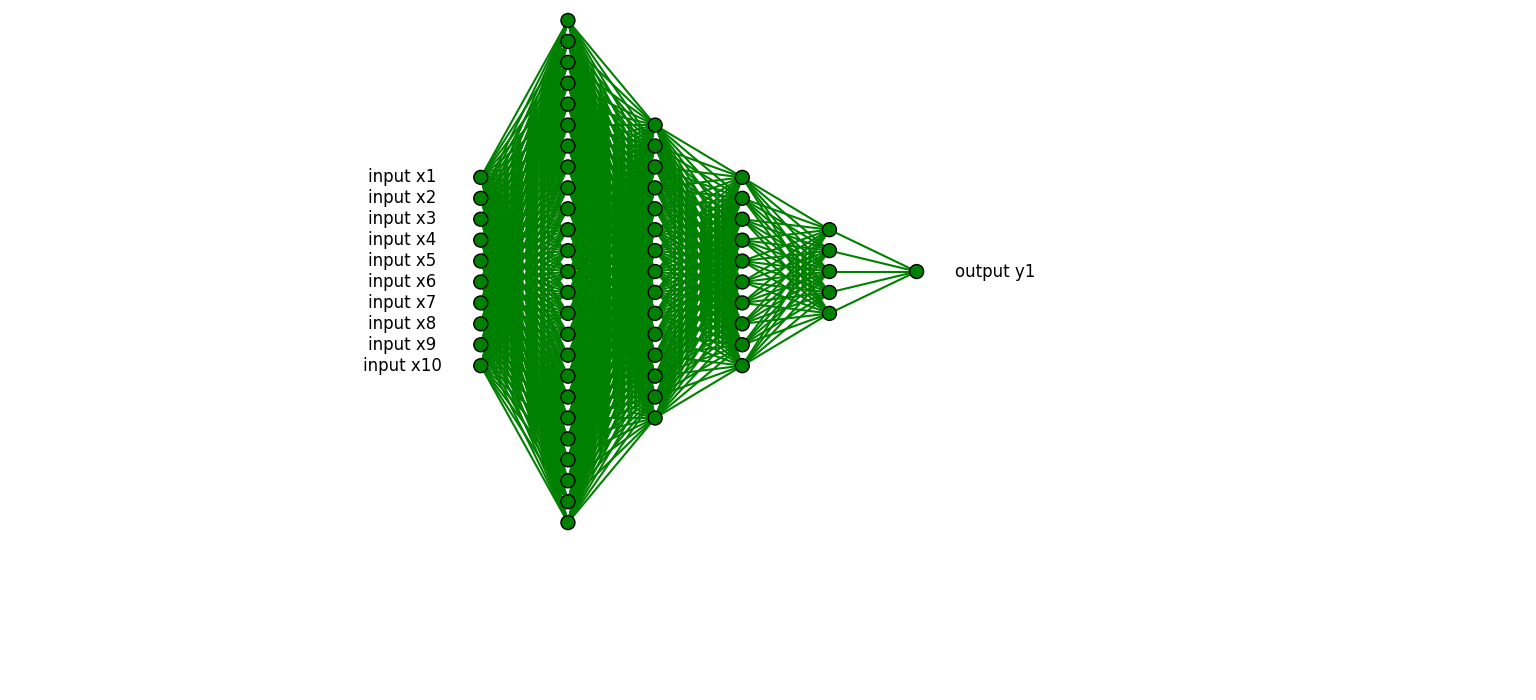

In [18]:
import numpy as np
from main.neural_network import train, predict
from main.nn_components.draw_nn import draw_nn
from main.nn_components.network_layer import FullyConnectedLayer
from main.nn_components.activations_functions import Relu, Tanh
from main.nn_components.loss_functions import mse, mse_derivative
from sklearn.model_selection import train_test_split
from itertools import product
from main.nn_components.graphic_regression import learning_curve, dispersion_graph

def generate_n_dimensional_xor(n):
    X = np.array(list(product([0, 1], repeat=n)))
    y = np.sum(X, axis=1) % 2
    
    X = X.reshape(2**n, n, 1)
    y = y.reshape(2**n, 1)
    
    return X, y

X, y = generate_n_dimensional_xor(10)

X_train, X_test, y_train, y_test = train_test_split(X, y)


nn = [
    FullyConnectedLayer(10, 25),
    Relu(),
    FullyConnectedLayer(25, 15),
    Relu(),
    FullyConnectedLayer(15, 10),
    Relu(),
    FullyConnectedLayer(10, 5),
    Relu(),
    FullyConnectedLayer(5, 1)
]

draw_nn(nn)

In [19]:
train_loss = train(nn, mse, mse_derivative, X_train, y_train, epochs=10000, learning_rate=0.000001, optim='sgd')

Final Loss = 0.24933079036210878


In [13]:

y_pred = []
for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output}, Actual: {y}')

Pred: [[0.49671061]], Actual: [1]
Pred: [[0.65078295]], Actual: [0]
Pred: [[0.50586171]], Actual: [1]
Pred: [[0.39944486]], Actual: [0]
Pred: [[0.56202002]], Actual: [0]
Pred: [[0.54584067]], Actual: [0]
Pred: [[0.52042406]], Actual: [0]
Pred: [[0.51049436]], Actual: [1]
Pred: [[0.48087846]], Actual: [1]
Pred: [[0.5632528]], Actual: [1]
Pred: [[0.5056521]], Actual: [0]
Pred: [[0.54885506]], Actual: [0]
Pred: [[0.51716537]], Actual: [1]
Pred: [[0.50665348]], Actual: [0]
Pred: [[0.57219202]], Actual: [1]
Pred: [[0.5774398]], Actual: [0]
Pred: [[0.6069953]], Actual: [0]
Pred: [[0.42061864]], Actual: [0]
Pred: [[0.38095291]], Actual: [1]
Pred: [[0.52556701]], Actual: [0]
Pred: [[0.45726974]], Actual: [1]
Pred: [[0.52773415]], Actual: [1]
Pred: [[0.38394423]], Actual: [1]
Pred: [[0.53492638]], Actual: [1]
Pred: [[0.56802314]], Actual: [0]
Pred: [[0.48371809]], Actual: [0]
Pred: [[0.44189823]], Actual: [0]
Pred: [[0.53233191]], Actual: [1]
Pred: [[0.48319719]], Actual: [1]
Pred: [[0.45721218

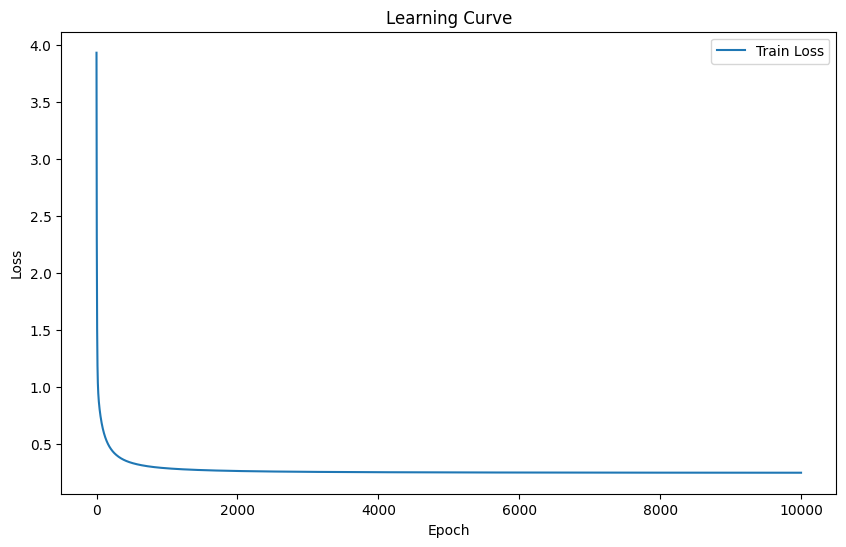

In [20]:
learning_curve(train_loss)

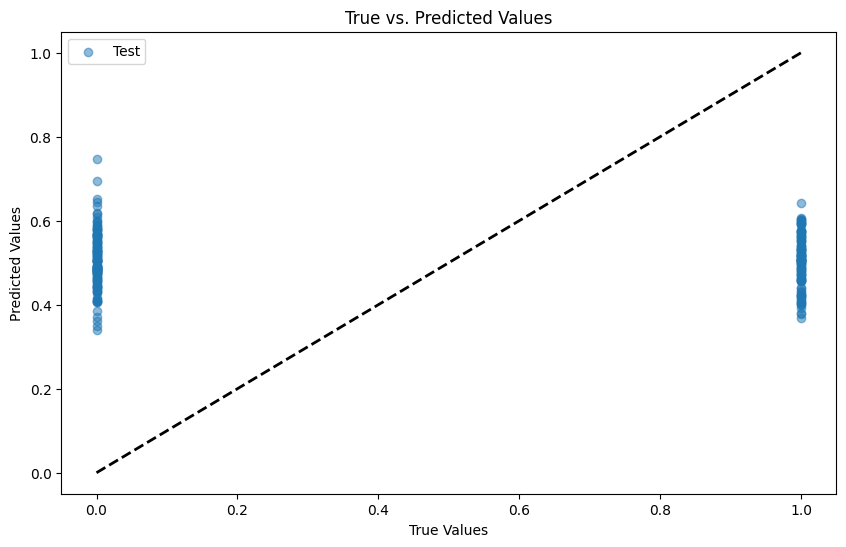

In [21]:
dispersion_graph(y_test, y_pred)